RANDOM FOREST MODEL

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

In [3]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/MEFAR_DOWN.csv")

# Split features and target variable
X = data.drop(columns='class', axis=1)
Y = data['class']


In [4]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)


In [5]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=3)

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameter search space
param_dist_rf = {
    'n_estimators': randint(10, 200),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(
    rf_model, param_distributions=param_dist_rf, n_iter=10, cv=10, scoring='accuracy', random_state=42
)
random_search_rf.fit(X_train, Y_train)

# Printing the best hyperparameters for Random Forest
print("Best hyperparameters for Random Forest:", random_search_rf.best_params_)

# Get the best-tuned Random Forest model
best_rf_model = random_search_rf.best_estimator_
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Define the Stratified K-Folds cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on the training data
train_accuracies = []
validation_accuracies = []

for fold, (train_index, val_index) in enumerate(kfold.split(X_train, Y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]

    # Train the model
    best_rf_model.fit(X_train_fold, Y_train_fold)

    # Calculate training accuracy
    train_accuracy = best_rf_model.score(X_train_fold, Y_train_fold)
    train_accuracies.append(train_accuracy)

    # Calculate validation accuracy
    val_accuracy = best_rf_model.score(X_val_fold, Y_val_fold)
    validation_accuracies.append(val_accuracy)

    # Print the fold number and training accuracy
    print(f"Fold {fold}: Training Accuracy = {train_accuracy}")

# Print the average training accuracy and validation accuracies
print("\nAverage Training Accuracy (10-fold cross-validation):", np.mean(train_accuracies))
print("Average Validation Accuracy (10-fold cross-validation):", np.mean(validation_accuracies))
print("Validation Accuracies (10-fold cross-validation):", validation_accuracies)


Best hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 131}
Fold 1: Training Accuracy = 0.9788413098236776
Fold 2: Training Accuracy = 0.9797481108312343
Fold 3: Training Accuracy = 0.9789420654911839
Fold 4: Training Accuracy = 0.9787405541561713
Fold 5: Training Accuracy = 0.979294710327456
Fold 6: Training Accuracy = 0.979294710327456
Fold 7: Training Accuracy = 0.9783889980353635
Fold 8: Training Accuracy = 0.9789935015868219
Fold 9: Training Accuracy = 0.9795476298423254
Fold 10: Training Accuracy = 0.9794468792504156

Average Training Accuracy (10-fold cross-validation): 0.9791238469672106
Average Validation Accuracy (10-fold cross-validation): 0.9537991830156057
Validation Accuracies (10-fold cross-validation): [0.9587488667271079, 0.9592021758839528, 0.9542157751586582, 0.9605621033544878, 0.942429737080689, 0.9528558476881233, 0.9510204081632653, 0.9532879818594104, 0.9

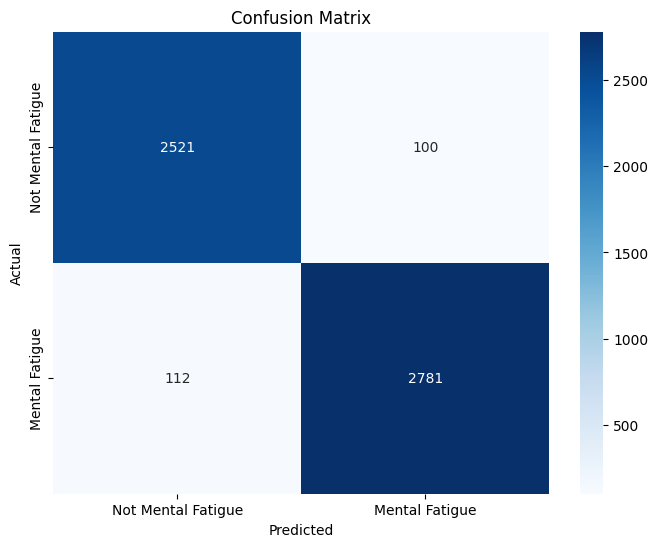

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      2621
         1.0       0.97      0.96      0.96      2893

    accuracy                           0.96      5514
   macro avg       0.96      0.96      0.96      5514
weighted avg       0.96      0.96      0.96      5514



In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
Y_pred = best_rf_model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Mental Fatigue', 'Mental Fatigue'], yticklabels=['Not Mental Fatigue', 'Mental Fatigue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print(classification_report(Y_test, Y_pred))


In [7]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')
    plt.show()

def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def plot_precision_recall_curve(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    pr_auc = auc(recall, precision)
    plt.figure()

    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

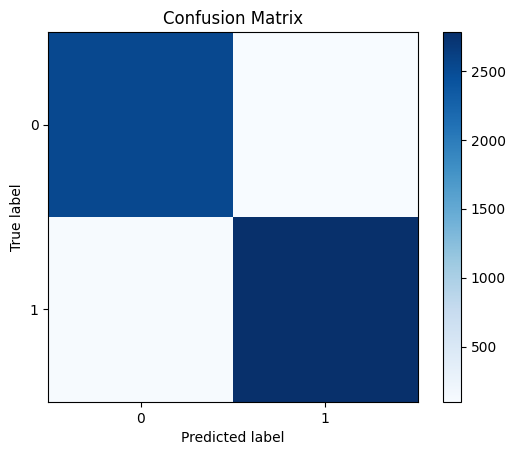

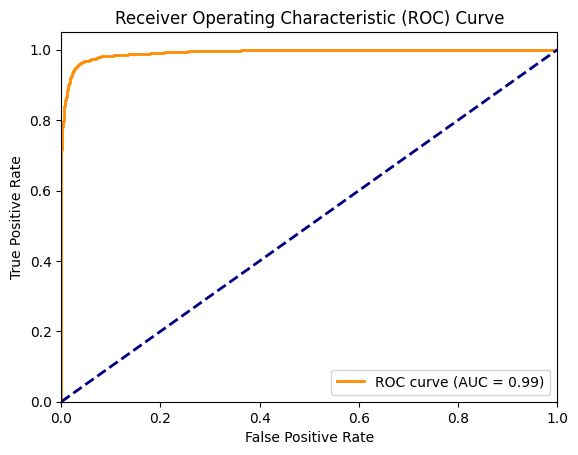

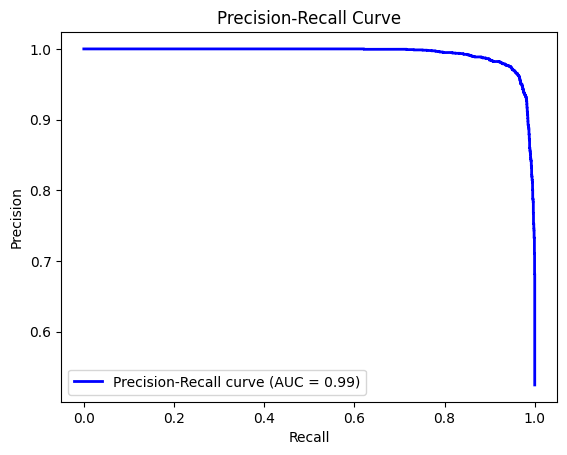

In [8]:
# Plot metrics for Random Forest model
plot_confusion_matrix(Y_test, best_rf_model.predict(X_test))
plot_roc_curve(Y_test, best_rf_model.predict_proba(X_test)[:, 1])
plot_precision_recall_curve(Y_test, best_rf_model.predict_proba(X_test)[:, 1])

In [9]:
# Print confusion matrix for Random Forest model
print("\nConfusion Matrix - Random Forest:")
print(conf_matrix)


Confusion Matrix - Random Forest:
[[2521  100]
 [ 112 2781]]


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate additional performance metrics for Random Forest model
rf_y_pred = best_rf_model.predict(X_test)
rf_precision = precision_score(Y_test, rf_y_pred)
rf_recall = recall_score(Y_test, rf_y_pred)
rf_f1_score = f1_score(Y_test, rf_y_pred)

# Calculate Sensitivity (Recall) and Specificity
tn, fp, fn, tp = confusion_matrix(Y_test, rf_y_pred).ravel()
rf_sensitivity = tp / (tp + fn)
rf_specificity = tn / (tn + fp)

# Calculate Positive Predictive Value (Precision) and Negative Predictive Value (NPV)
rf_positive_predictive_value = tp / (tp + fp)
rf_negative_predictive_value = tn / (tn + fn)

# Calculate Weighted Average
rf_weighted_average = (rf_precision + rf_recall + rf_f1_score) / 3

print("Random Forest Model Performance Metrics:")
print(f"Precision: {rf_precision}")
print(f"Recall (Sensitivity): {rf_recall}")
print(f"F1 Score: {rf_f1_score}")
print(f"Specificity: {rf_specificity}")
print(f"Positive Predictive Value (Precision): {rf_positive_predictive_value}")
print(f"Negative Predictive Value (NPV): {rf_negative_predictive_value}")
print(f"Weighted Average: {rf_weighted_average}")

Random Forest Model Performance Metrics:
Precision: 0.9652898299201667
Recall (Sensitivity): 0.9612858624265468
F1 Score: 0.9632836854866643
Specificity: 0.9618466234261732
Positive Predictive Value (Precision): 0.9652898299201667
Negative Predictive Value (NPV): 0.9574629699962021
Weighted Average: 0.9632864592777927


In [11]:
# Calculate RMSE for Random Forest model
rf_y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_y_pred_prob))

print("Root Mean Square Error (RMSE) - Random Forest:", rf_rmse)

Root Mean Square Error (RMSE) - Random Forest: 0.23799858697090287


LOGISTIC REGRESSION

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
import numpy as np

# Define the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Define the hyperparameter search space
param_dist_logistic = {
    'penalty': ['l2'],  # Only 'l2' penalty to avoid lbfgs issue
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': randint(50, 200)  # Generating integer values for max_iter
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_logistic = RandomizedSearchCV(
    logistic_model, param_distributions=param_dist_logistic, n_iter=10, cv=10, scoring='accuracy', random_state=42
)
random_search_logistic.fit(X_train, Y_train)

# Printing the best hyperparameters for logistic regression
print("Best hyperparameters for Logistic Regression:", random_search_logistic.best_params_)

# Get the best-tuned logistic regression model
best_logistic_model = random_search_logistic.best_estimator_

# Define the Stratified K-Folds cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on the training data with the tuned logistic regression model
logistic_train_accuracies = []
logistic_validation_accuracies = []

for fold, (train_index, val_index) in enumerate(kfold.split(X_train, Y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]

    # Train the tuned logistic regression model
    best_logistic_model.fit(X_train_fold, Y_train_fold)

    # Calculate training accuracy
    logistic_train_accuracy = best_logistic_model.score(X_train_fold, Y_train_fold)
    logistic_train_accuracies.append(logistic_train_accuracy)

    # Calculate validation accuracy
    logistic_val_accuracy = best_logistic_model.score(X_val_fold, Y_val_fold)
    logistic_validation_accuracies.append(logistic_val_accuracy)

    # Print the fold number and training accuracy
    print(f"Fold {fold}: Training Accuracy = {logistic_train_accuracy}")

# Print the average training accuracy and validation accuracies
print("\nAverage Training Accuracy (10-fold cross-validation):", np.mean(logistic_train_accuracies))
print("Average Validation Accuracy (10-fold cross-validation):", np.mean(logistic_validation_accuracies))
print("Validation Accuracies (10-fold cross-validation):", logistic_validation_accuracies)


Best hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 124, 'penalty': 'l2', 'solver': 'liblinear'}
Fold 1: Training Accuracy = 0.6458438287153653
Fold 2: Training Accuracy = 0.6470528967254408
Fold 3: Training Accuracy = 0.64544080604534
Fold 4: Training Accuracy = 0.6450377833753148
Fold 5: Training Accuracy = 0.6490176322418136
Fold 6: Training Accuracy = 0.6430226700251889
Fold 7: Training Accuracy = 0.6455090423656239
Fold 8: Training Accuracy = 0.6460631706211274
Fold 9: Training Accuracy = 0.6459120447332628
Fold 10: Training Accuracy = 0.645458667069669

Average Training Accuracy (10-fold cross-validation): 0.6458358541918147
Average Validation Accuracy (10-fold cross-validation): 0.6444491317228008
Validation Accuracies (10-fold cross-validation): [0.6577515865820489, 0.642792384406165, 0.6387126019945603, 0.6504986400725294, 0.6341795104261106, 0.6727107887579329, 0.6458049886621315, 0.6281179138321995, 0.636734693877551, 0.63718820861678]


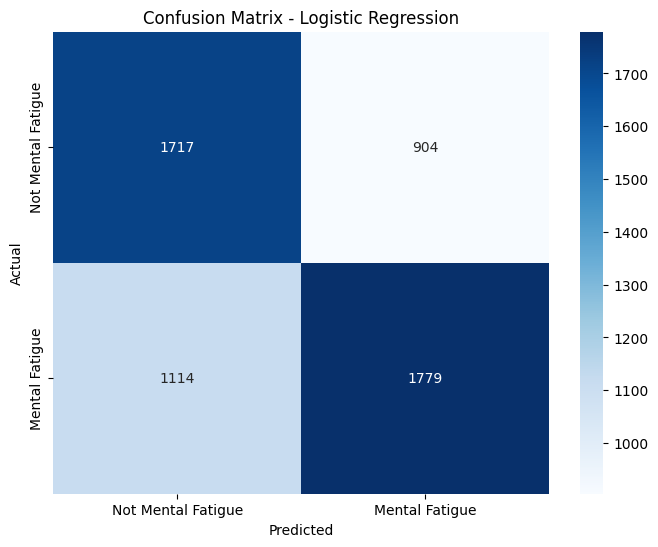

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63      2621
         1.0       0.66      0.61      0.64      2893

    accuracy                           0.63      5514
   macro avg       0.63      0.64      0.63      5514
weighted avg       0.64      0.63      0.63      5514



In [13]:
# Predict on the test set using logistic regression model
Y_pred_logistic = best_logistic_model.predict(X_test)

# Create a confusion matrix for logistic regression
conf_matrix_logistic = confusion_matrix(Y_test, Y_pred_logistic)

# Plot confusion matrix for logistic regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Mental Fatigue', 'Mental Fatigue'], yticklabels=['Not Mental Fatigue', 'Mental Fatigue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Generate classification report for logistic regression
print("Classification Report - Logistic Regression:")
print(classification_report(Y_test, Y_pred_logistic))


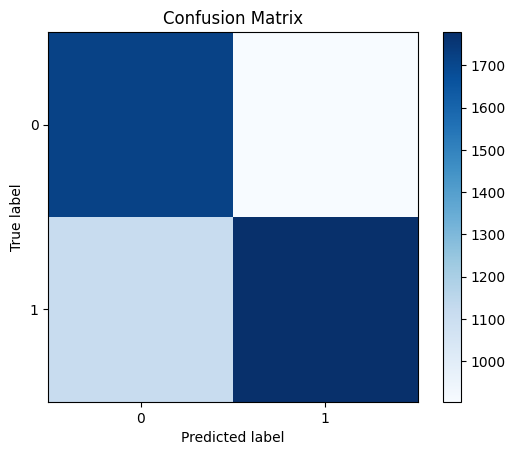

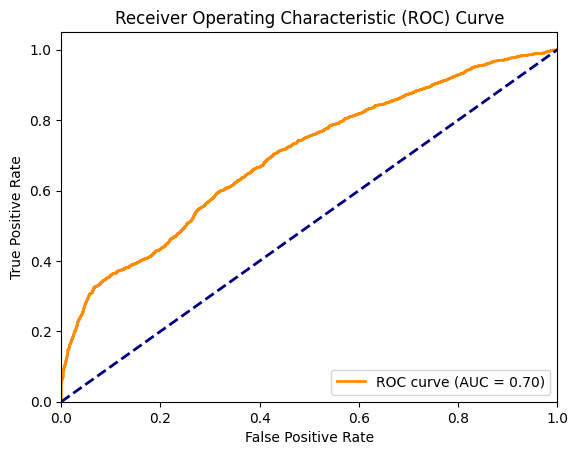

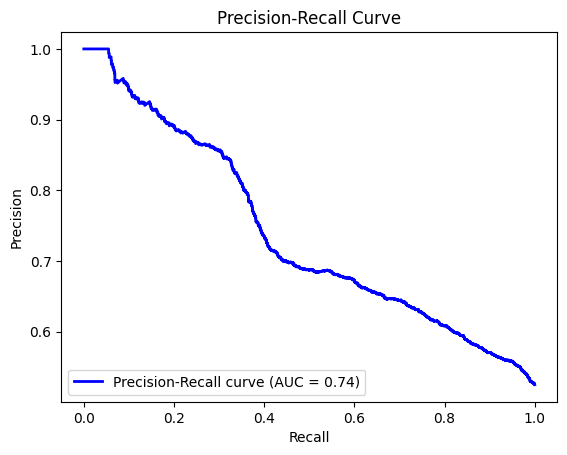

In [14]:
# Plot metrics for Logistic Regression model
plot_confusion_matrix(Y_test, best_logistic_model.predict(X_test))
plot_roc_curve(Y_test, best_logistic_model.predict_proba(X_test)[:, 1])
plot_precision_recall_curve(Y_test, best_logistic_model.predict_proba(X_test)[:, 1])

In [15]:
# Print confusion matrix for Logistic Regression model
print("\nConfusion Matrix - Logistic Regression:")
print(conf_matrix_logistic)


Confusion Matrix - Logistic Regression:
[[1717  904]
 [1114 1779]]


In [16]:
# Calculate additional performance metrics for Logistic Regression model
logistic_y_pred = best_logistic_model.predict(X_test)
logistic_precision = precision_score(Y_test, logistic_y_pred)
logistic_recall = recall_score(Y_test, logistic_y_pred)
logistic_f1_score = f1_score(Y_test, logistic_y_pred)

# Calculate Sensitivity (Recall) and Specificity
tn, fp, fn, tp = confusion_matrix(Y_test, logistic_y_pred).ravel()
logistic_sensitivity = tp / (tp + fn)
logistic_specificity = tn / (tn + fp)

# Calculate Positive Predictive Value (Precision) and Negative Predictive Value (NPV)
logistic_positive_predictive_value = tp / (tp + fp)
logistic_negative_predictive_value = tn / (tn + fn)

# Calculate Weighted Average
logistic_weighted_average = (logistic_precision + logistic_recall + logistic_f1_score) / 3

print("\nLogistic Regression Model Performance Metrics:")
print(f"Precision: {logistic_precision}")
print(f"Recall (Sensitivity): {logistic_recall}")
print(f"F1 Score: {logistic_f1_score}")
print(f"Specificity: {logistic_specificity}")
print(f"Positive Predictive Value (Precision): {logistic_positive_predictive_value}")
print(f"Negative Predictive Value (NPV): {logistic_negative_predictive_value}")
print(f"Weighted Average: {logistic_weighted_average}")


Logistic Regression Model Performance Metrics:
Precision: 0.6630637346254193
Recall (Sensitivity): 0.6149325959211891
F1 Score: 0.6380918220946915
Specificity: 0.6550934757726059
Positive Predictive Value (Precision): 0.6630637346254193
Negative Predictive Value (NPV): 0.6064994701518898
Weighted Average: 0.6386960508804332


In [17]:
# Calculate RMSE for Logistic Regression model
logistic_y_pred_prob = best_logistic_model.predict_proba(X_test)[:, 1]
logistic_rmse = np.sqrt(mean_squared_error(Y_test, logistic_y_pred_prob))

print("Root Mean Square Error (RMSE) - Logistic Regression:", logistic_rmse)

Root Mean Square Error (RMSE) - Logistic Regression: 0.4665119687028598


KNN

In [18]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameter search space
param_dist_knn = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': randint(10, 50)
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_knn = RandomizedSearchCV(
    knn_model, param_distributions=param_dist_knn, n_iter=10, cv=10, scoring='accuracy', random_state=42
)
random_search_knn.fit(X_train, Y_train)

# Printing the best hyperparameters for KNN
print("Best hyperparameters for KNN:", random_search_knn.best_params_)

# Get the best-tuned KNN model
best_knn_model = random_search_knn.best_estimator_

# Define the Stratified K-Folds cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on the training data with the tuned KNN model
knn_train_accuracies = []
knn_validation_accuracies = []

for fold, (train_index, val_index) in enumerate(kfold.split(X_train, Y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]

    # Train the tuned KNN model
    best_knn_model.fit(X_train_fold, Y_train_fold)

    # Calculate training accuracy
    knn_train_accuracy = best_knn_model.score(X_train_fold, Y_train_fold)
    knn_train_accuracies.append(knn_train_accuracy)

    # Calculate validation accuracy
    knn_val_accuracy = best_knn_model.score(X_val_fold, Y_val_fold)
    knn_validation_accuracies.append(knn_val_accuracy)

    # Print the fold number and training accuracy
    print(f"Fold {fold}: Training Accuracy = {knn_train_accuracy}")

# Print the average training accuracy and validation accuracies
print("\nAverage Training Accuracy (10-fold cross-validation):", np.mean(knn_train_accuracies))
print("Average Validation Accuracy (10-fold cross-validation):", np.mean(knn_validation_accuracies))
print("Validation Accuracies (10-fold cross-validation):", knn_validation_accuracies)

Best hyperparameters for KNN: {'algorithm': 'ball_tree', 'leaf_size': 12, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Fold 1: Training Accuracy = 0.9418136020151133
Fold 2: Training Accuracy = 0.9430226700251889
Fold 3: Training Accuracy = 0.9420654911838791
Fold 4: Training Accuracy = 0.9422670025188917
Fold 5: Training Accuracy = 0.9431234256926952
Fold 6: Training Accuracy = 0.9445340050377834
Fold 7: Training Accuracy = 0.9423202861316811
Fold 8: Training Accuracy = 0.940103773109667
Fold 9: Training Accuracy = 0.9425217873155005
Fold 10: Training Accuracy = 0.944184172082011

Average Training Accuracy (10-fold cross-validation): 0.9425956215112411
Average Validation Accuracy (10-fold cross-validation): 0.9047423744354193
Validation Accuracies (10-fold cross-validation): [0.9061650045330916, 0.9111514052583862, 0.9070716228467816, 0.914777878513146, 0.8889392565729828, 0.9025385312783318, 0.9079365079365079, 0.9102040816326531, 0.9052154195011338, 0.8934240362811792]


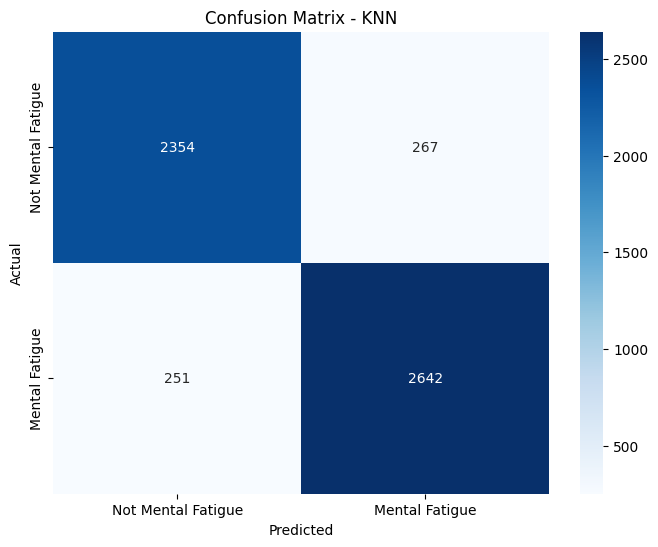

Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2621
         1.0       0.91      0.91      0.91      2893

    accuracy                           0.91      5514
   macro avg       0.91      0.91      0.91      5514
weighted avg       0.91      0.91      0.91      5514



In [19]:
# Predict on the test set using KNN model
Y_pred_knn = best_knn_model.predict(X_test)

# Create a confusion matrix for KNN
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Mental Fatigue', 'Mental Fatigue'], yticklabels=['Not Mental Fatigue', 'Mental Fatigue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

# Generate classification report for KNN
print("Classification Report - KNN:")
print(classification_report(Y_test, Y_pred_knn))


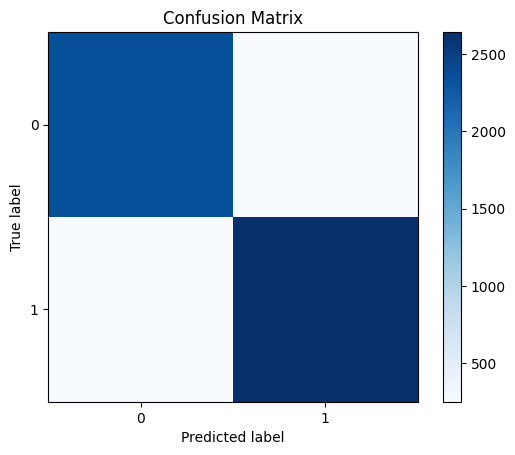

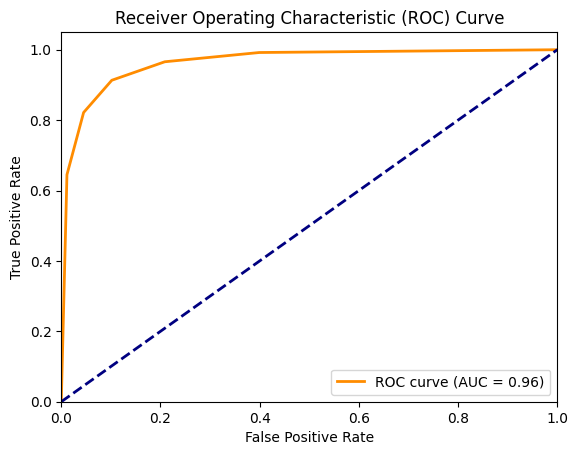

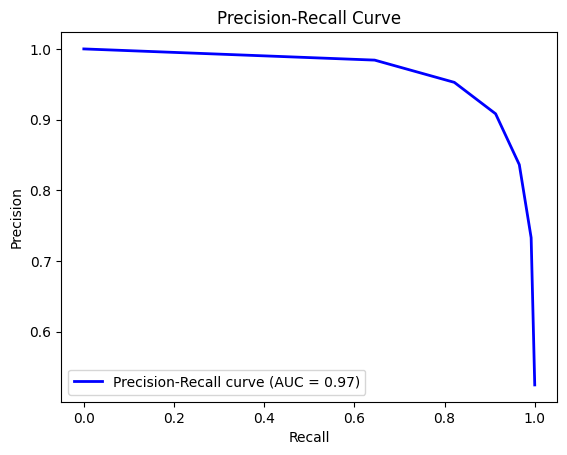

In [20]:
# Plot metrics for KNN model
plot_confusion_matrix(Y_test, best_knn_model.predict(X_test))
plot_roc_curve(Y_test, best_knn_model.predict_proba(X_test)[:, 1])
plot_precision_recall_curve(Y_test, best_knn_model.predict_proba(X_test)[:, 1])

In [21]:
# Print confusion matrix for KNN model
print("\nConfusion Matrix - KNN:")
print(conf_matrix_knn)


Confusion Matrix - KNN:
[[2354  267]
 [ 251 2642]]


In [22]:
# Calculate additional performance metrics for KNN model
knn_y_pred = best_knn_model.predict(X_test)
knn_precision = precision_score(Y_test, knn_y_pred)
knn_recall = recall_score(Y_test, knn_y_pred)
knn_f1_score = f1_score(Y_test, knn_y_pred)

# Calculate Sensitivity (Recall) and Specificity
tn, fp, fn, tp = confusion_matrix(Y_test, knn_y_pred).ravel()
knn_sensitivity = tp / (tp + fn)
knn_specificity = tn / (tn + fp)

# Calculate Positive Predictive Value (Precision) and Negative Predictive Value (NPV)
knn_positive_predictive_value = tp / (tp + fp)
knn_negative_predictive_value = tn / (tn + fn)

# Calculate Weighted Average
knn_weighted_average = (knn_precision + knn_recall + knn_f1_score) / 3

print("\nKNN Model Performance Metrics:")
print(f"Precision: {knn_precision}")
print(f"Recall (Sensitivity): {knn_recall}")
print(f"F1 Score: {knn_f1_score}")
print(f"Specificity: {knn_specificity}")
print(f"Positive Predictive Value (Precision): {knn_positive_predictive_value}")
print(f"Negative Predictive Value (NPV): {knn_negative_predictive_value}")
print(f"Weighted Average: {knn_weighted_average}")


KNN Model Performance Metrics:
Precision: 0.9082158817463045
Recall (Sensitivity): 0.9132388524023505
F1 Score: 0.9107204412271631
Specificity: 0.8981304845478825
Positive Predictive Value (Precision): 0.9082158817463045
Negative Predictive Value (NPV): 0.9036468330134357
Weighted Average: 0.9107250584586061


In [23]:
# Calculate RMSE for KNN model
knn_y_pred_prob = best_knn_model.predict_proba(X_test)[:, 1]
knn_rmse = np.sqrt(mean_squared_error(Y_test, knn_y_pred_prob))

print("Root Mean Square Error (RMSE) - KNN:", knn_rmse)

Root Mean Square Error (RMSE) - KNN: 0.2672825676750216
